**Instituto de Informática - UFG**

Disciplina: Inteligência Artificial

Prof. Cedric Luiz de Carvalho


Grupo (A)

---


Aluna(o): Gabriel Viana Dantas - Engenheiro de Conhecimento

---

Aluna(o): Thiago Emanuell Vieira Moura - Gerente

---

Aluna(o): Wendel Marques de Jesus Souza - Analista de Dados

#Especificação do problema : Lógica nebulosa

O setor de aluguéis de imóveis movimenta milhões por ano. Com a pandemia do coronavírus, esse setor tem sido forçado a se reinventar, uma vez que o contato direto (presencial) entre os interessados em alugar um imóvel e os corretores tem sido prejudicado. Você e sua equipe foram contratados por uma empresa do setor para projetar e implementar um sistema de recomendação que faça sugestões para os clientes de imóveis que possam ser do seu interesse. 

Utilizando a base de dados [brazilian_houses_to_rent](https://www.kaggle.com/rubenssjr/brasilian-houses-to-rent), projete e implemente um sistema de recomendação, baseado em lógica nebulosa, que identifique os imóveis mais adequados às necessidades de um determinado cliente.

Nesse projeto, devem ser identificadas as variáveis de entrada nebulosas, as quais devem ter, no mínimo, três faixas valores. Também deve ser definida uma variável de saída que indique a probabilidade do cliente se interessar por um dado imóvel.




**Recomendações:**

O primeiro passo para resolver um problema é entendê-lo muito bem, considerar o contexto e fazer as abstrações necessárias. A seguir, para não "reinventar a roda" é preciso identificar como a comunidade resolveu o problema em questão, ou problemas parecidos, cuja solução possa ser mapeada para situação em análise. Desta forma, deve ser feito um estudo, o mais amplo possível sobre esse assunto. O próximo passo é o grupo se reunir e instanciar o modelo em estudo para o caso específico do problema a ser resolvido. Em paralelo, uma análise rigorosa deve ser feita na base de dados a fim de prepará-la para seu uso no modelo. Finalmente, com o modelo bem compreendido e instanciado e os dados devidamente preparados, a implementação do modelo pode ser feita.

Observação: O trabalho deve ser feito EM GRUPO, mas a avaliação será feita individualmente. Para isso, o grupo deverá fazer um planejamento/cronograma de trabalho.

**Produtos a serem entregues:**

Relatório técnico, no formato especificado (gerente). Deve indicar o grupo, com a designação dos respectivos papeis.
Notebook com a AED (analista de dados). A base de dados original não deve ser alterada. Todo o processamento e seleção dos dados a serem utilizados deve ser feita na aplicação.
Notebook com a implementação (engenheiro de conhecimento)
Video de apresentação do trabalho (gerente) - no grupo com 4 alunos, essa tarefa deve ser feita pelo quarto aluno, e não pelo gerente.

# Objetivos deste artefato

O objetivo geral é a obtenção de *insights* sobre o conjunto de dados.  Para tanto, serão utilizadas técnicas de visualização de dados e alguns cálculos estátisticos básicos. Essa etapa é chamada de análise exploratória de dados (AED). Por meio dela, é possível também encontrar problemas, padrões e relacionamentos que poderão apoiar a etapa de pré-processamento, que antecede a implementação. 

# Descrição geral da base de dados

### A base de dados

A base [brazilian_houses_to_rent](https://www.kaggle.com/rubenssjr/brasilian-houses-to-rent) é composta por dados sobre imóveis para alugar no Brasil. Os dados foram coletados da plataforma [Quinto Andar](https://www.quintoandar.com.br/) via Web Crawler.

#### Headers

* **city**: Cidade onde o imóvel está localizado;
* **area**: Área do imóvel (em m²);
* **rooms**: quantidade de quartos;
* **bathroom**: quantidade de banheiros;
* **parking spaces**: Quantidade de vagas de estacionamento;
* **floor**: informa o andar do imóvel;
* **animal**: informa se aceita animal;
* **furniture**: informa se o apartamento já é mobilíado;

* **hoa**: Valor do condomínio (em R$);

* **rent amount**: valor do aluguel (em R$);

* **property tax**: IPTU (em R$);

* **fire insurance**: valor do Seguro Incendio (em R$)

* **total**: custo total por mês (em R$)

</br></br></br>

Cobertura temporal: 13/03/2020 a 10/04/2020

Nome do arquivo (base de dados): houses_to_rent_v2.csv

# Passos preliminares

###Bibliotecas utilizadas

In [ ]:
#biblitoecas utilizadas na etada AED
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore') #evita que warnings sejam mostrados
from sklearn.preprocessing import LabelEncoder
from scipy import stats

### Leitura dos dados

In [ ]:
# Carrega a base de dados para o ambiente virtual
from google.colab import files
uploaded = files.upload()

Saving houses_to_rent_v2.csv to houses_to_rent_v2.csv


In [ ]:
#Leitura dos dados
df = pd.read_csv('/content/houses_to_rent_v2.csv')

In [ ]:
#Exemplo de uma linha do conjunto de dados 
df.head(1)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618


# Análise exploratória dos dados

### Informações básicas sobre o DataFrame
Dimensionalidade e descrição estatística

In [ ]:
#Verificação de algumas linhas 
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [ ]:
#Verificação da dimensionalidade do DataFrame
df.shape

(10692, 13)

In [ ]:
#Informações dos atributos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


In [ ]:
#Descrição estatística de cada recurso
df.describe()

,area,rooms,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04
mean,149.217920,2.506079,2.236813,1.609147,1.174022e+03,3896.247194,366.704358,53.300879,5.490487e+03
std,537.016942,1.171266,1.407198,1.589521,1.559231e+04,3408.545518,3107.832321,47.768031,1.648473e+04
min,11.000000,1.000000,1.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,56.000000,2.000000,1.000000,0.000000,1.700000e+02,1530.000000,38.000000,21.000000,2.061750e+03
50%,90.000000,2.000000,2.000000,1.000000,5.600000e+02,2661.000000,125.000000,36.000000,3.581500e+03
75%,182.000000,3.000000,3.000000,2.000000,1.237500e+03,5000.000000,375.000000,68.000000,6.768000e+03
max,46335.000000,13.000000,10.000000,12.000000,1.117000e+06,45000.000000,313700.000000,677.000000,1.120000e+06


**Observações:**

* Os valores máximos para cada coluna (dos atributos númericos) estão longe da mediana da coluna e da média que significa que eles são valores discrepantes em potencial (outliers).

* Há tipos *int e object.*

* Possui 10692 linhas (imóveis para alugar) e 13 colunas (atributos).

* Média dos aluguéis: R$ 3896,25

### Valores faltantes e linhas duplicadas

In [ ]:
#Verificação de valores missing
for coluna in df.columns:
    print("Qtd. de valores faltantes em {}: {}".format(coluna, df[coluna].isna().sum()))

Qtd. de valores faltantes em city: 0
Qtd. de valores faltantes em area: 0
Qtd. de valores faltantes em rooms: 0
Qtd. de valores faltantes em bathroom: 0
Qtd. de valores faltantes em parking spaces: 0
Qtd. de valores faltantes em floor: 0
Qtd. de valores faltantes em animal: 0
Qtd. de valores faltantes em furniture: 0
Qtd. de valores faltantes em hoa (R$): 0
Qtd. de valores faltantes em rent amount (R$): 0
Qtd. de valores faltantes em property tax (R$): 0
Qtd. de valores faltantes em fire insurance (R$): 0
Qtd. de valores faltantes em total (R$): 0


In [ ]:
#Verifica se tem duplicates
df[df.duplicated()]

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
244,Porto Alegre,47,1,1,1,1,not acept,furnished,400,2200,0,33,2633
920,Belo Horizonte,40,1,1,1,2,not acept,furnished,0,970,0,13,983
1060,São Paulo,136,3,3,3,13,acept,not furnished,1430,4206,364,54,6054
1064,São Paulo,20,1,1,0,5,acept,furnished,602,1800,130,23,2555
1108,Campinas,184,4,3,4,-,acept,not furnished,0,3240,220,49,3509
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10560,Porto Alegre,40,1,1,1,9,not acept,furnished,1300,1200,68,18,2586
10569,Belo Horizonte,20,1,1,1,-,acept,furnished,0,1100,0,15,1115
10623,Porto Alegre,47,1,1,1,1,not acept,furnished,400,2200,0,33,2633
10640,São Paulo,27,1,1,0,5,not acept,not furnished,1405,3500,1,45,4951


**Resultados:**
* Como base nos resultados, é possível afirmar que a base de dados não possui valores faltantes, mas que possui linhas duplicadas.

### Análise dos atributos

O processo de análise foi guiado pelos seguintes questionamentos:
* Como os dados estão distribuídos?
* A base tem outliers?
* Qual é a correlação entre cada atributo?

#### Como os dados estão distribuídos?

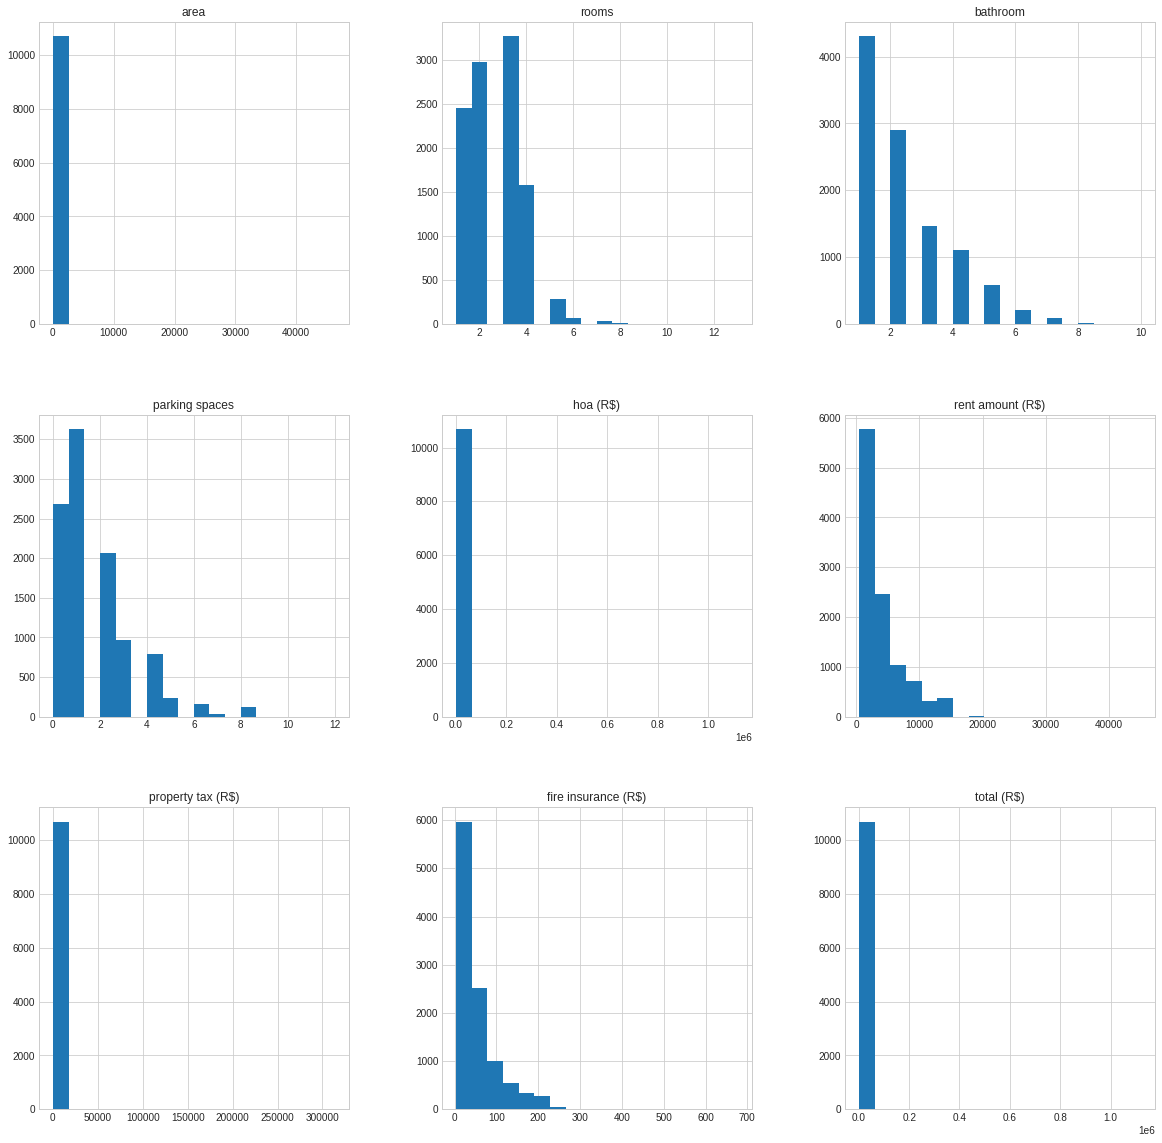

In [ ]:
#Verificando a distribuição dos dados
plt.style.use('seaborn-whitegrid')
df.hist(bins=18,figsize=(20,20))
plt.show()

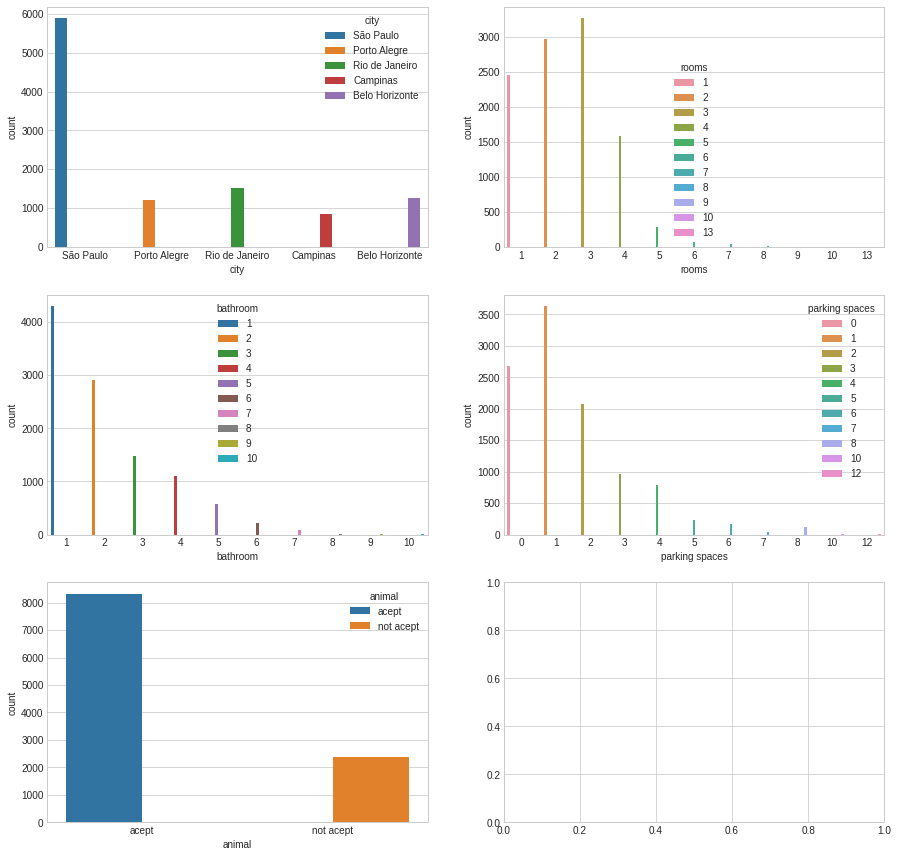

In [ ]:
discrete=['city','rooms','bathroom','parking spaces','animal']
fig,axis=plt.subplots(3,2,figsize=(15,15))
k=0
for discrete in discrete:
    plt.style.use('seaborn-whitegrid')
    data=df[discrete].value_counts().to_dict()
    axis=axis.flatten()
    sns.countplot(x=df[discrete],hue=df[discrete],ax=axis[k])
    k=k+1
plt.show()



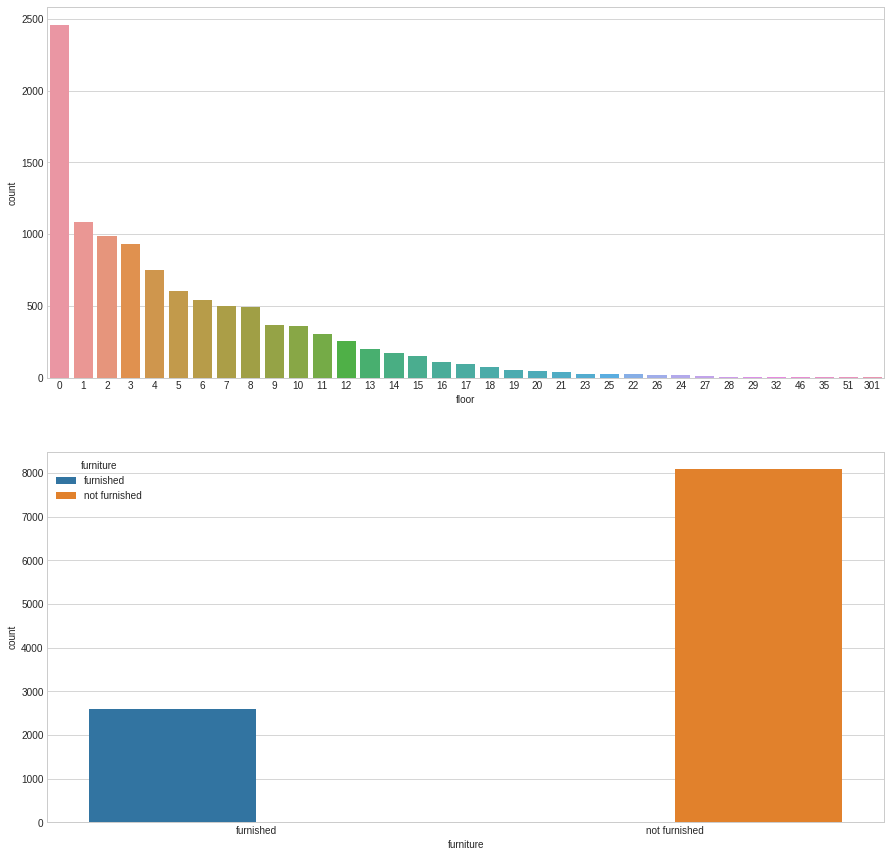

In [ ]:
df2 = df
#Subsitui "-" por zero em floor
df2.floor.replace(to_replace={"-": 0}, inplace=True)
discrete=['floor', 'furniture']
fig,axis=plt.subplots(2,1,figsize=(15,15))
k=0
for discrete in discrete:
    plt.style.use('seaborn-whitegrid')
    data=df2[discrete].value_counts().to_dict()
    axis=axis.flatten()
    if k == 0:
      sns.countplot(df2.floor,order=df2.floor.value_counts().keys(),ax=axis[k])
    else:
      sns.countplot(x=df[discrete],hue=df[discrete],ax=axis[k])
    k=k+1
plt.show()

In [ ]:
print('furniture:')
print(df.furniture.value_counts())

print('\n\nanimal:')
print(df.animal.value_counts())

print('\n\ncity:')
print(df.city.value_counts())

print('\n\nbathroom:')
print(df.bathroom.value_counts())

print('\nfloor:')
print(df2.floor.value_counts())


furniture:
not furnished    8086
furnished        2606
Name: furniture, dtype: int64


animal:
acept        8316
not acept    2376
Name: animal, dtype: int64


city:
São Paulo         5887
Rio de Janeiro    1501
Belo Horizonte    1258
Porto Alegre      1193
Campinas           853
Name: city, dtype: int64


bathroom:
1     4301
2     2910
3     1474
4     1111
5      578
6      215
7       85
8       11
9        4
10       3
Name: bathroom, dtype: int64

floor:
0      2461
1      1081
2       985
3       931
4       748
5       600
6       539
7       497
8       490
9       369
10      357
11      303
12      257
13      200
14      170
15      147
16      109
17       96
18       75
19       53
20       44
21       42
23       25
25       25
22       24
26       20
24       19
27        8
28        6
29        5
32        2
46        1
35        1
51        1
301       1
Name: floor, dtype: int64


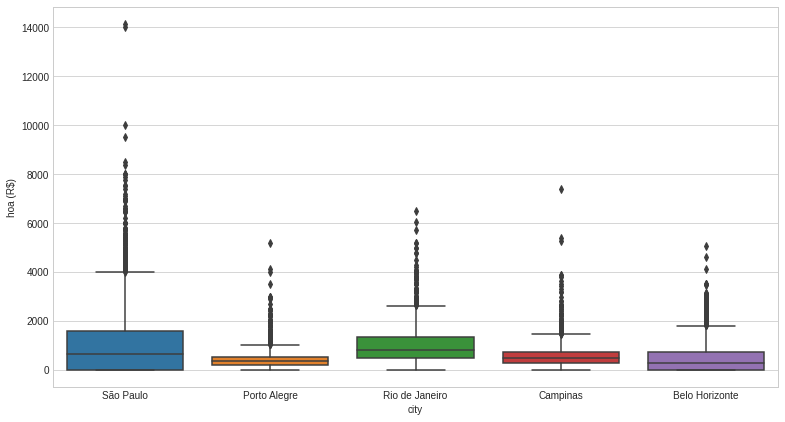

In [ ]:
#Verificando a taxa HOA por cidade
for col in df2.columns:
    if 'float' in str(df2[col].dtype) or 'int' in str(df2[col].dtype) and col not in ['bathroom', 'rooms', 'parking spaces']:
        #pandas.DataFrame.std Retorna o desvio padrão da amostra sobre o eixo solicitado
        df2 = df2[ df2[col] < df2[col].mean()+df2[col].std()*4 ]

fig, ax = plt.subplots(figsize=(13, 7))
sns.boxplot(data=df2, x='city', y='hoa (R$)', ax=ax)




Em São Paulo, 0.76 dos imóveis permitem animais.
Em Porto Alegre, 0.84 dos imóveis permitem animais.
Em Rio de Janeiro, 0.80 dos imóveis permitem animais.
Em Campinas, 0.81 dos imóveis permitem animais.
Em Belo Horizonte, 0.74 dos imóveis permitem animais.





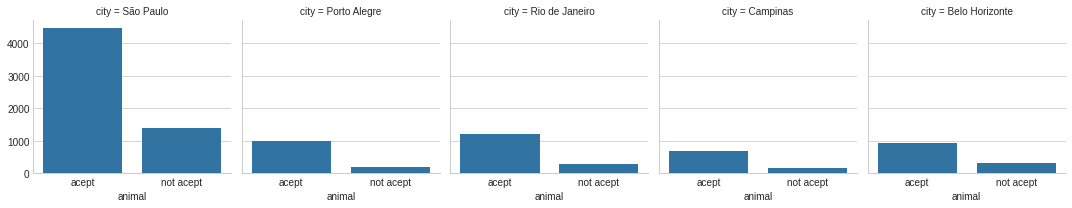

In [ ]:
#Verificando a porcentagem de casas que permitem animais de estimação em cada cidade
g = sns.FacetGrid(df, col="city")
g.map(sns.countplot, 'animal', order=['acept', 'not acept'])

print('\n\n')
for city in df.city.unique():
    city_data = df[df.city == city]
    print('Em {}, {} dos imóveis permitem animais.'.format(city, str(city_data.animal.value_counts()['acept']/city_data.shape[0])[:4]))
print('\n\n')

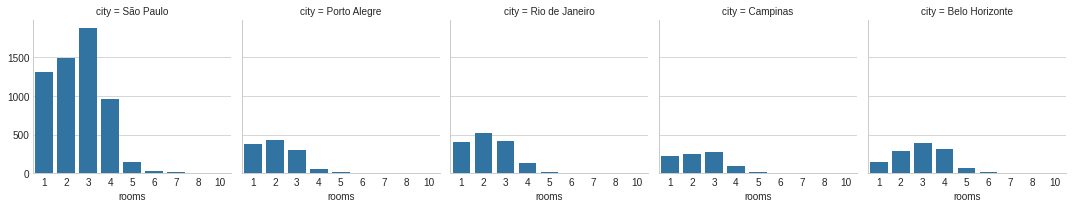

In [ ]:
#Verificando a frequência de cada quantidade quarto por cidade

g = sns.FacetGrid(df2, col='city')
g.map(sns.countplot, 'rooms')

*   Em São Paulo casas com cômodos de 1 a 4 são as mais comuns
*   Em Porto Alegre casas com cômodos de 1 a 3 são as mais comuns
*   Em Rio de Janeiro casas com cômodos de 1 a 3 são as mais comuns
*   Em Campinas as casas com cômodos de 1 a 3 são as mais comuns
*   Em Belo Horizonte as casas com cômodos de 2 a 4 são as mais comuns

In [ ]:
#Verificando a média de aluguel por cidade
df.groupby('city')['rent amount (R$)'].mean().reset_index().sort_values('rent amount (R$)',ascending=False)

,city,rent amount (R$)
4,São Paulo,4652.793783
0,Belo Horizonte,3664.127981
3,Rio de Janeiro,3232.904064
1,Campinas,2364.290739
2,Porto Alegre,2337.699916


**Observações gerais**

**De acordo com o resultados acima, podemos afirmar que a maioria dos imóveis possuem as seguintes caracteristicas:**
* Localização: São Paulo;
* Quantidade de quartos: 1 a 2;
* Quantidade de banheiros: 1 a 2;
* Vagas na garagem: 0 a 1;
* Andar: 1 e 2;
* Aceitam animais;
* Não possuem mobília.

**Sobre "floor":**
* Aparentemente, quanto mais alto o número do andar, menos frequente ele é.

* Alguns campos da coluna "floor" possuem valor "-". 

**Valor do aluguel:**
* Nessa base de dados, São Paulo é a cidade com o maior valor de aluguel.

**Taxa de condomínio por cidade:**
* Os imóveis das cidades de São Paulo e Rio de Janeiro tendem a possuir as maiores taxas de condomínio.
* Em Porto Alegre paga-se taxas menores.


#### A base tem outliers?

Text(0, 0.5, 'Total (R$)')

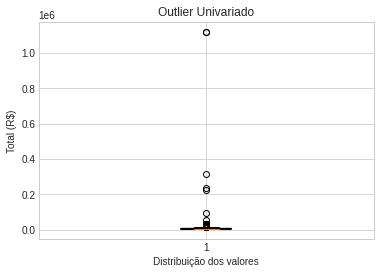

In [ ]:
#Verificando outliers em total
total = df['total (R$)']
plt.boxplot(total, total.min(), 'o')
plt.title('Outlier Univariado')
plt.xlabel('Distribuição dos valores')
plt.ylabel('Total (R$)')

In [ ]:
#exibição dos imóveis fora da curva
df.loc[total>100000]

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
255,Belo Horizonte,155,1,4,0,4,not acept,not furnished,1117000,2790,64,38,1120000
2859,São Paulo,285,4,5,4,6,acept,furnished,200000,20000,1834,254,222100
6230,São Paulo,340,5,4,2,7,acept,not furnished,220000,12000,1000,153,233200
6645,São Paulo,42,1,2,1,6,not acept,not furnished,690,2500,313700,32,316900
6979,Belo Horizonte,155,1,4,0,4,not acept,not furnished,1117000,2790,64,38,1120000


Text(0, 0.5, 'Valor do condomínio (R$)')

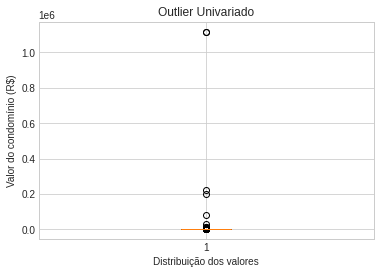

In [ ]:
#Verificando outliers em hoa
valor_condominio = df['hoa (R$)']
plt.boxplot(valor_condominio, valor_condominio.min(), 'o')
plt.title('Outlier Univariado')
plt.xlabel('Distribuição dos valores')
plt.ylabel('Valor do condomínio (R$)')

In [ ]:
#exibição dos imóveis fora da curva
df.loc[valor_condominio>100000]

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
255,Belo Horizonte,155,1,4,0,4,not acept,not furnished,1117000,2790,64,38,1120000
2859,São Paulo,285,4,5,4,6,acept,furnished,200000,20000,1834,254,222100
6230,São Paulo,340,5,4,2,7,acept,not furnished,220000,12000,1000,153,233200
6979,Belo Horizonte,155,1,4,0,4,not acept,not furnished,1117000,2790,64,38,1120000


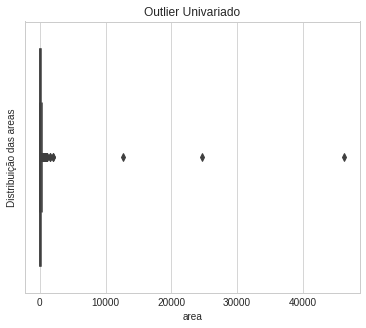

In [ ]:
#Verificando outliers em area
plt.figure(figsize=(6,5))
plt.title('Outlier Univariado')
plt.ylabel('Distribuição das areas')
sns.boxplot(x=df.area)


In [ ]:
#exibição dos imóveis fora da curva
df.loc[df.area>10000]

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
2397,Belo Horizonte,46335,4,8,5,11,acept,furnished,960,8500,646,114,10220
5915,São Paulo,24606,5,4,4,12,acept,not furnished,2254,8100,7859,103,18320
9241,Campinas,12732,3,2,0,3,acept,not furnished,700,1600,96,21,2417


Text(0, 0.5, 'Valor do aluguel (R$)')

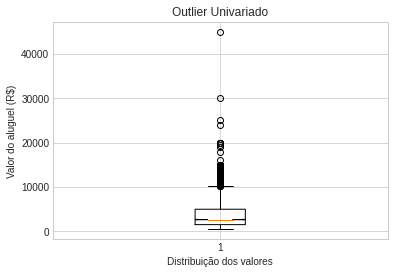

In [ ]:
valor_aluguel = df['rent amount (R$)']
plt.boxplot(valor_aluguel, valor_aluguel.min(), 'o')
plt.title('Outlier Univariado')
plt.xlabel('Distribuição dos valores')
plt.ylabel('Valor do aluguel (R$)')

In [ ]:
#Exibição dos imóveis fora da curva
df.loc[df['rent amount (R$)']>20000]


,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
2182,São Paulo,700,4,7,8,0,acept,not furnished,0,45000,8750,677,54430
2619,São Paulo,80,2,1,1,1,acept,not furnished,875,24000,0,305,25180
6947,São Paulo,486,8,4,6,0,acept,not furnished,0,25000,2200,376,27580
7748,São Paulo,350,3,3,3,0,acept,not furnished,0,30000,560,451,31010


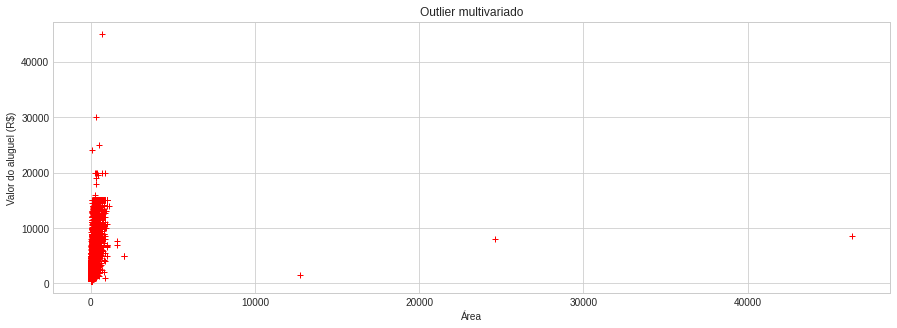

In [ ]:
fig = plt.figure(figsize=(15,5))
area = df['area']
valor = df['rent amount (R$)']
plt.xlabel('Área')
plt.ylabel('Valor do aluguel (R$)')
plt.title('Outlier multivariado')
plt.plot(area, valor, "r+",)

In [ ]:
df.loc[(df['area'] > 10000) | (df['total (R$)'] > 220000)]

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
255,Belo Horizonte,155,1,4,0,4,not acept,not furnished,1117000,2790,64,38,1120000
2397,Belo Horizonte,46335,4,8,5,11,acept,furnished,960,8500,646,114,10220
2859,São Paulo,285,4,5,4,6,acept,furnished,200000,20000,1834,254,222100
5915,São Paulo,24606,5,4,4,12,acept,not furnished,2254,8100,7859,103,18320
6230,São Paulo,340,5,4,2,7,acept,not furnished,220000,12000,1000,153,233200
6645,São Paulo,42,1,2,1,6,not acept,not furnished,690,2500,313700,32,316900
6979,Belo Horizonte,155,1,4,0,4,not acept,not furnished,1117000,2790,64,38,1120000
9241,Campinas,12732,3,2,0,3,acept,not furnished,700,1600,96,21,2417


In [ ]:
df.loc[255]

city                   Belo Horizonte
area                              155
rooms                               1
bathroom                            4
parking spaces                      0
floor                               4
animal                      not acept
furniture               not furnished
hoa (R$)                      1117000
rent amount (R$)                 2790
property tax (R$)                  64
fire insurance (R$)                38
total (R$)                    1120000
Name: 255, dtype: object

Este é uma exemplo de outlier, em que:
* hoa (R$) =                     1117000

* total (R$) = 1220000

* rent amount (R$)      =           2790

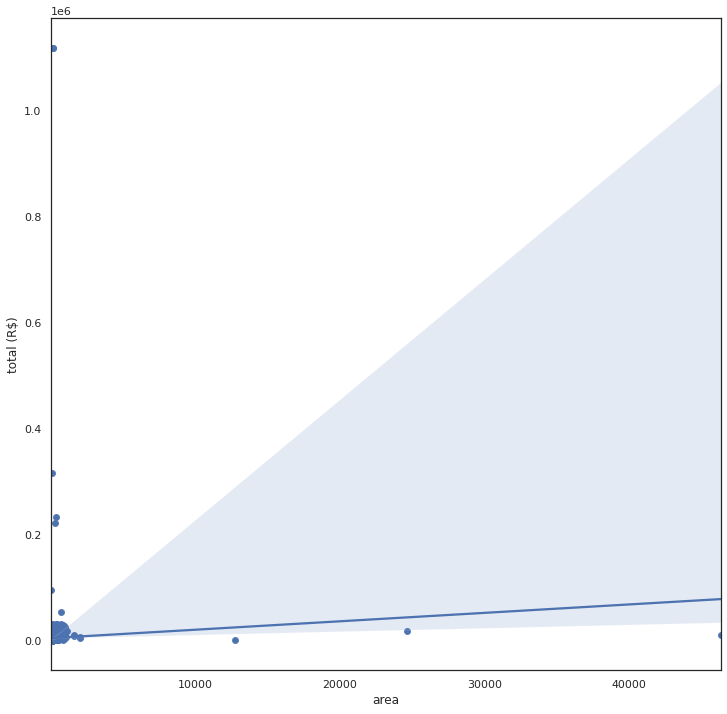

In [ ]:
plt.figure(figsize=(12,12))
sns.set(style='white')
sns.scatterplot(x=df['area'], y=df['total (R$)'])
sns.regplot(x=df['area'], y=df['total (R$)'])

Resultados: 
* A base de dados possui outliers. 

#### Qual é a correlação entre cada atributo?

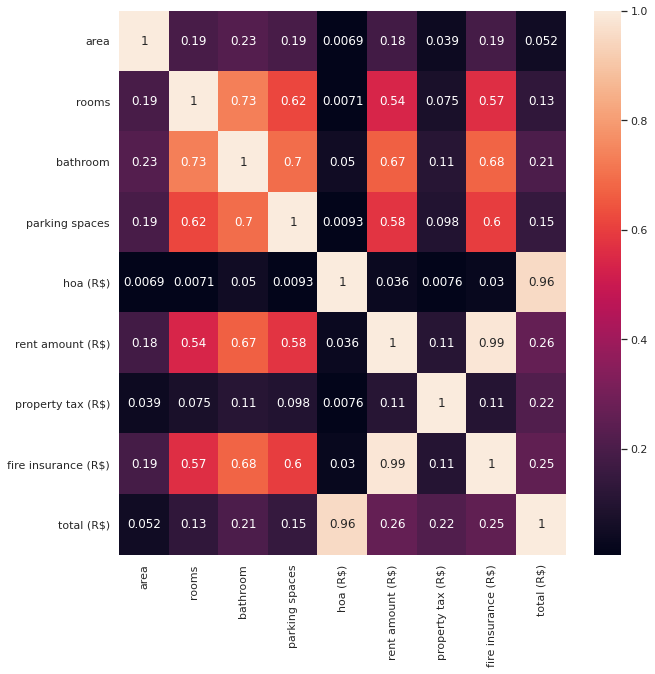





rent amount (R$)       1.000000
fire insurance (R$)    0.987343
bathroom               0.668504
parking spaces         0.578361
rooms                  0.541758
total (R$)             0.264490
area                   0.180742
property tax (R$)      0.107884
hoa (R$)               0.036490
Name: rent amount (R$), dtype: float64


In [ ]:
correlacao = df.corr()
plt.figure(figsize =(10,10))
sns.heatmap(correlacao,annot =True)
plt.show()
print('\n\n\n')
print(correlacao['rent amount (R$)'].sort_values(ascending=False))

O mapa de calor sugere que o valor do aluguel tem baixa correlação linear com o valor do condomínio, em quanto que com "fire insurance" apresenta uma correlação muito forte

#Possíveis problemas encontrados na base de dados



**Floor**
* Alguns campos da coluna "floor" possuem valor "-". Pela análises realizadas, vamos considerar que esses valores representam o térreo. Uma solução, é subistituir "-" por "0".

**Outliers**:
* É razoável o fato de que exista outliers na base de dado, pricipalmente se levarmos em consideração a forma de extração. Entretanto, faz-se necessário remover alguns desses dados. 

**Duplicates:**
* A base de dados possui dados duplicados. É necessário remover.

**Valores discrepantes:**
* É possível que a base possua valores discrepantes, que não condizem com a realidade. Podem ter sugido por causa de erros na extração dos dados ou erro de digitação (dos usuários do Quinto Andar). Uma possível solução é a remoção de alguns outliers, mas isso não garante que todos os valores disrepencates serão removidos. Em relação aos valores discrepantes que sobrarem, nada podemos fazer.

# Sugestão de variáveis para serem utilizadas na implementação
As células abaixo foram repassadas tanto para o Engenheiro de Conhecimento quanto para o Gerente.

## Limpeza dos dados (Resolução de problemas)

In [ ]:
#Leitura dos dados
df = pd.read_csv('/content/houses_to_rent_v2.csv')

#### Floor

Alguns campos da coluna "floor" possuem valor "-". Pelas análises realizadas, vamos considerar que esses valores representam o térreo. Assim, uma solução, é subistituir "-" por "0".

In [ ]:
#Solução: substituição de '-' por '0'
df.floor.replace(to_replace={"-": '0'}, inplace=True)
df.loc[df['floor']=='0']

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
5,São Paulo,376,3,3,7,0,acept,not furnished,0,8000,834,121,8955
15,Campinas,330,4,6,6,0,acept,furnished,680,8000,328,121,9129
19,São Paulo,600,4,5,6,0,acept,not furnished,0,12000,9500,181,21680
20,São Paulo,100,7,4,0,0,acept,not furnished,0,3800,118,58,3976
23,São Paulo,35,1,1,0,0,acept,not furnished,0,1100,3,14,1117
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10659,Campinas,150,3,2,4,0,acept,furnished,0,3500,186,53,3739
10661,Campinas,250,1,2,2,0,acept,not furnished,0,2200,602,34,2836
10668,São Paulo,24,1,1,0,0,acept,not furnished,0,870,0,14,884
10674,Rio de Janeiro,135,4,2,1,0,acept,not furnished,0,3300,115,51,3466


#### Duplicates:

A base de dados possui dados duplicados. É necessário remover.

In [ ]:
#Estrutura original
df.shape

(10692, 13)

In [ ]:
#Remoção de duplicates
df.drop_duplicates(keep= 'first', inplace=True)

In [ ]:
#Estrutura após a remoção de linhas duplicadas
df.shape

(10334, 13)

#### Outliers:

É razoável o fato de que exista outliers na base de dados, principalmente se levarmos em consideração a forma de extração. Entretanto, faz-se necessário remover alguns desses dados.

In [ ]:
#Remoção de outliers em "total (R$)", "hoa (R$)", "rent amount (R$)" e "area"

row_remove = []
row_remove.append(list(df.loc[df['total (R$)']>100000].index))
row_remove.append(list(df.loc[df['hoa (R$)']>100000].index))
row_remove.append(list(df.loc[df['rent amount (R$)']>20000].index))
row_remove.append(list(df.loc[df['area']>10000].index))
row_remove

[[255, 2859, 6230, 6645],
 [255, 2859, 6230],
 [2182, 2619, 6947, 7748],
 [2397, 5915, 9241]]

In [ ]:
#Estrutura original
df.shape

(10334, 13)

In [ ]:
lista_indices = []
for indices in row_remove:
  for index in indices:
    lista_indices.append(index)
df.drop(df.index[lista_indices], inplace=True)

In [ ]:
#Estrutura após exclusão
df.shape

(10323, 13)

##Seleção de variáveis

Em um recente estudo, o QuintoAndar verificou o comportamento dos usuários ao buscar imóveis cadastrados na plataforma de acordo com os filtros usados. 

Do total das buscas realizadas em 2020:
* 23% possuía o filtro "Pode ter animais de estimação";
* 14% possuía o filtro "Mobiliado";
* 10% possuía o filtro "Não mobiliado";

Além disso, principalmente com base na análise exploratória dos dados, é possível afimar que o valor do aluguel, bem como o número de quartos são fatores relevantes.

Sendo assim, como variáveis de entrada, é recomendado uso da combinação dos valores das colunas "animal", "furniture", "rent amount (R$)" e "rooms".
<br/>
<br/><br/>
**Referências:**
* [Conheça os filtros oferecidos pelo QuintoAndar pra você buscar o seu imóvel ideal](https://meulugar.quintoandar.com.br/buscar-imoveis-no-quintoandar-conheca-os-principais-filtros-de-pesquisa/)
* [QuintoAndar traça comportamento de usuários da plataforma por meio de seus filtros de busca](https://meulugar.quintoandar.com.br/quintoandar-identifica-comportamento-de-usuarios-ao-buscar-imovel/)
* [5 dicas para escolher o imóvel certo para alugar](https://financaspessoais.organizze.com.br/5-dicas-para-escolher-o-imovel-certo-para-alugar/)
